In [31]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
data = pd.read_csv("Stroke_dum.csv", encoding="utf-8")

In [34]:
data=data.loc[data['age']>=32]
data

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,51676,61.0,202.21,NaN,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,0,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,1
4,1665,79.0,174.12,24.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5106,44873,81.0,125.20,40.0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5107,19723,35.0,82.99,30.6,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5108,37544,51.0,166.29,25.6,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [35]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


predictors=['age', 'avg_glucose_level', 'hypertension_1', 'heart_disease_1', 'gender_Female', 'smoking_status_smokes','work_type_Private']
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(data[predictors], data['stroke_1'])

data_over_X = pd.DataFrame(data=X_over, columns=predictors)
data_over_y = pd.DataFrame(data=y_over, columns=['stroke_1'])
data_over_X
data_over_y

data_over_y.value_counts()

,age,hypertension_1,heart_disease_1,gender_Female,smoking_status_smokes,work_type_Private
0,67.0,0,1,0,0,1
1,61.0,0,0,1,0,0
2,80.0,0,1,0,0,1
3,49.0,0,0,1,1,1
4,79.0,1,0,1,0,0
...,...,...,...,...,...,...
6423,79.0,0,1,1,1,1
6424,57.0,0,1,1,0,1
6425,57.0,0,0,1,1,1
6426,61.0,0,0,1,0,0


,stroke_1
0,1
1,1
2,1
3,1
4,1
...,...
6423,1
6424,1
6425,1
6426,1


stroke_1
0           3214
1           3214
Name: count, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_over_X, data_over_y, test_size=0.3)
X_train
y_train

,age,hypertension_1,heart_disease_1,gender_Female,smoking_status_smokes,work_type_Private
2842,55.0,0,0,0,1,0
824,55.0,0,0,1,0,1
5492,78.0,0,0,1,0,0
3267,34.0,0,0,0,0,1
4160,81.0,0,0,0,0,0
...,...,...,...,...,...,...
5316,42.0,0,0,0,0,1
1853,70.0,0,0,1,0,1
1411,32.0,0,0,1,0,0
3366,60.0,0,0,1,0,1


,stroke_1
2842,0
824,0
5492,1
3267,0
4160,1
...,...
5316,1
1853,0
1411,0
3366,0


In [37]:
X_train_age=X_train['age']
X_train_age
y_train=y_train['stroke_1']

2842    55.0
824     55.0
5492    78.0
3267    34.0
4160    81.0
        ... 
5316    42.0
1853    70.0
1411    32.0
3366    60.0
575     58.0
Name: age, Length: 4499, dtype: float64

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X_train_age=np.array(X_train_age).reshape(-1,1)
y_train=np.array(y_train)
X_train_age
y_train

array([[55.],
       [55.],
       [78.],
       ...,
       [32.],
       [60.],
       [58.]])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=20).fit(X_train_age, y_train)

In [42]:
model.intercept_

array([-4.34345221])

In [43]:
model.coef_

array([[0.07013515]])

In [44]:
model.predict_proba(X_train_age)

array([[0.61916812, 0.38083188],
       [0.61916812, 0.38083188],
       [0.24469859, 0.75530141],
       ...,
       [0.89081833, 0.10918167],
       [0.53378421, 0.46621579],
       [0.56847046, 0.43152954]])

In [45]:
model.score(X_train_age, y_train)

0.6721493665258946

In [46]:
confusion_matrix(X_train_age, model.predict(X_train_age))

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 64,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 190,   0, ...,   0,   0,   0],
       [  0, 133,   0, ...,   0,   0,   0],
       [  0, 128,   0, ...,   0,   0,   0]], dtype=int64)

In [47]:
print(classification_report(y_train, model.predict(X_train_age)))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2267
           1       0.67      0.68      0.67      2232

    accuracy                           0.67      4499
   macro avg       0.67      0.67      0.67      4499
weighted avg       0.67      0.67      0.67      4499



In [48]:
import statsmodels.api as sm
model2 = sm.Logit(y_train, X_train_age)

In [49]:
X_res_train_3 = sm.add_constant(X_train_age)
model3 = sm.Logit(y_train, X_res_train_3)
result3 = model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.589744
         Iterations 5
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.149      
Date:               2023-11-24 17:39 AIC:              5310.5164  
No. Observations:   4499             BIC:              5323.3397  
Df Model:           1                Log-Likelihood:   -2653.3    
Df Residuals:       4497             LL-Null:          -3118.3    
Converged:          1.0000           LLR p-value:      2.7402e-204
No. Iterations:     5.0000           Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.3650     0.1633   -26.7372   0.0000   -4.6849   -4.0450
x1         0.0705     0.0026    27.4182   0.0

In [50]:
result = model2.fit()

Optimization terminated successfully.
         Current function value: 0.688846
         Iterations 3


In [51]:
result.pred_table()

array([[   0., 2267.],
       [   0., 2232.]])

In [52]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.006    
Date:               2023-11-24 17:39 AIC:              6200.2352
No. Observations:   4499             BIC:              6206.6468
Df Model:           0                Log-Likelihood:   -3099.1  
Df Residuals:       4498             LL-Null:          -3118.3  
Converged:          1.0000           LLR p-value:      nan      
No. Iterations:     3.0000           Scale:            1.0000   
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       0.0029      0.0005    6.2053    0.0000    0.0020    0.0039



Regesion logistica con tres variables

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(data_over_X, data_over_y)

0.685749844430616

array([[652, 295],
       [303, 679]], dtype=int64)

<Axes: >

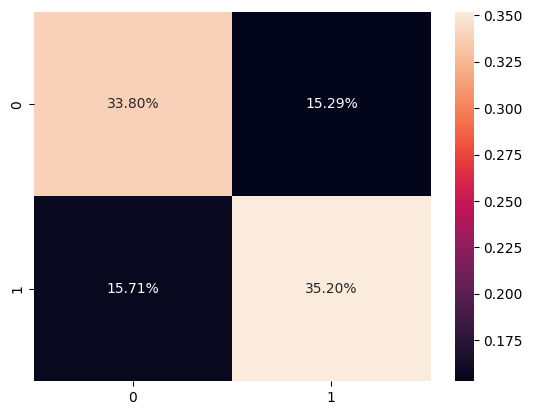

In [54]:
import numpy as np
cm = confusion_matrix(y_test, y_pred);
cm
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

In [55]:
from sklearn.metrics import accuracy_score as acc


In [56]:
acc(y_test, y_pred)

0.6899948159668222

In [57]:
X_train_4 = sm.add_constant(X_train)
model4 = sm.Logit(y_train, X_train_4)
result4 = model4.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.580969
         Iterations 5
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   y                 Pseudo R-squared:  0.162      
Date:                 2023-11-24 17:39  AIC:               5241.5551  
No. Observations:     4499              BIC:               5286.4364  
Df Model:             6                 Log-Likelihood:    -2613.8    
Df Residuals:         4492              LL-Null:           -3118.3    
Converged:            1.0000            LLR p-value:       9.5687e-215
No. Iterations:       5.0000            Scale:             1.0000     
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -4.7297   0.1938 -24.4085 0.0000 -5.1095 -4.3499
age